### Shaon Bhattacharyya 2023701018

# Importing Important Libraries

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

# Analyzing the data 

In [2]:
def analyze_target_file(target_csv):
    """
    Analyze target.csv to get counts of samples
    """
    # Read target file
    targets = pd.read_csv(target_csv)
    
    # Calculate total samples
    total_samples = len(targets)
    
    # Calculate samples per label
    label_counts = targets['labels'].value_counts()
    
    print(f"Total number of samples: {total_samples}")
    print("\nSamples per label:")
    for label, count in label_counts.items():
        print(f"{label}: {count}")
        
    # Print counts for binary classifications
    print("\nBinary classification counts:")
    
    # Face vs House
    face_house = targets[targets['labels'].isin(['face', 'house'])]
    face_count = len(face_house[face_house['labels'] == 'face'])
    house_count = len(face_house[face_house['labels'] == 'house'])
    print(f"\nFace vs House:")
    print(f"Face: {face_count}")
    print(f"House: {house_count}")
    print(f"Total: {face_count + house_count}")
    
    # Face vs Scissors
    face_scissors = targets[targets['labels'].isin(['face', 'scissors'])]
    face_count = len(face_scissors[face_scissors['labels'] == 'face'])
    scissors_count = len(face_scissors[face_scissors['labels'] == 'scissors'])
    print(f"\nFace vs Scissors:")
    print(f"Face: {face_count}")
    print(f"Scissors: {scissors_count}")
    print(f"Total: {face_count + scissors_count}")

if __name__ == "__main__":
    TARGET_CSV = "targets.csv"
    analyze_target_file(TARGET_CSV)

Total number of samples: 1452

Samples per label:
rest: 588
scissors: 108
face: 108
cat: 108
shoe: 108
house: 108
scrambledpix: 108
bottle: 108
chair: 108

Binary classification counts:

Face vs House:
Face: 108
House: 108
Total: 216

Face vs Scissors:
Face: 108
Scissors: 108
Total: 216


In [11]:
import pandas as pd

# Read the text file
with open("/home/shaon/Cog_Science_AI/assign_1/subject1/labels.txt", "r", encoding="utf-8") as file:
    lines = [line.strip().split(maxsplit=1) for line in file]  # Split into two columns

# Convert to DataFrame
df = pd.DataFrame(lines)

# Save as CSV (comma-separated)
df.to_csv("subj_1_targets.csv", index=False, header=False, sep=",")

print("Conversion completed: output.csv")


Conversion completed: output.csv


## Processing the data chunck wise

In [14]:
def create_binary_dataset(base_folder, region, target_csv, label1, label2):
    """
    Create binary classification dataset for one region, organized by chunks
    """
    print(f"\nProcessing {label1} vs {label2} for region {region}")
    
    # Read feature file (space-separated, no header)
    if region == "vt":
        feature_file = os.path.join(base_folder, region, "features.csv")
        features = pd.read_csv(feature_file, header=None, sep=' ')
    else:
        region_full = os.path.join(region, "RL")
        feature_file = os.path.join(base_folder, region_full, "features.csv")
        features = pd.read_csv(feature_file, header=None, sep=' ')

    # Read target labels
    targets = pd.read_csv(target_csv)
    
    # Initialize lists to store data for each chunk
    all_features = []
    all_labels = []
    all_label_names = []
    
    # Process each chunk (0 to 11)
    for chunk in range(12):
        # Filter for required labels in current chunk
        chunk_mask = (targets['labels'].isin([label1, label2])) & (targets['chunks'] == chunk)
        filtered_chunk_targets = targets[chunk_mask]
        
        # Get features for selected labels using row indices
        selected_features = features.iloc[filtered_chunk_targets.index]
        
        # Create binary labels (0 for label1, 1 for label2)
        binary_labels = (filtered_chunk_targets['labels'] == label2).astype(int)
        
        # Append to lists
        all_features.append(selected_features)
        all_labels.append(binary_labels)
        all_label_names.append(filtered_chunk_targets['labels'])
    
    # Concatenate all chunks
    final_features = pd.concat(all_features, axis=0)
    final_labels = pd.concat(all_labels, axis=0)
    final_label_names = pd.concat(all_label_names, axis=0)
    
    # Create final dataframe
    final_df = final_features.copy()
    final_df['label'] = final_labels.values
    final_df['label_name'] = final_label_names.values
    
    # Save to CSV without index and without numbering the feature columns
    output_file = f"{region}_{label1}_vs_{label2}.csv"
    final_df.to_csv(output_file, index=False, header=False)
    
    print(f"Created {output_file}")
    print(f"Number of {label1}: {sum(final_labels == 0)}")
    print(f"Number of {label2}: {sum(final_labels == 1)}")
    
    # Print chunk-wise statistics
    for chunk in range(12):
        chunk_mask = targets['chunks'] == chunk
        chunk_data = final_df[chunk_mask]
        print(f"\nChunk {chunk}:")
        print(f"Number of {label1}: {sum((chunk_data['label'] == 0))}")
        print(f"Number of {label2}: {sum((chunk_data['label'] == 1))}")

def main():
    # Settings
    BASE_FOLDER = "subj1"  # Change this to your base folder path
    REGIONS = ["vt", "Inferior_frontal"]
    TARGET_CSV = "/home/shaon/Cog_Science_AI/assign_1/subj_1_targets.csv"
    
    # Process each region
    for region in REGIONS:
        # Create face vs house dataset
        create_binary_dataset(BASE_FOLDER, region, TARGET_CSV, "face", "house")
        
        # Create face vs scissors dataset
        create_binary_dataset(BASE_FOLDER, region, TARGET_CSV, "face", "scissors")

if __name__ == "__main__":
    main()


Processing face vs house for region vt
Created vt_face_vs_house.csv
Number of face: 108
Number of house: 108

Chunk 0:
Number of face: 9
Number of house: 9

Chunk 1:
Number of face: 9
Number of house: 9

Chunk 2:
Number of face: 9
Number of house: 9

Chunk 3:
Number of face: 9
Number of house: 9

Chunk 4:
Number of face: 9
Number of house: 9

Chunk 5:
Number of face: 9
Number of house: 9

Chunk 6:
Number of face: 9
Number of house: 9

Chunk 7:
Number of face: 9
Number of house: 9

Chunk 8:
Number of face: 9
Number of house: 9

Chunk 9:
Number of face: 9
Number of house: 9

Chunk 10:
Number of face: 9
Number of house: 9

Chunk 11:
Number of face: 9
Number of house: 9

Processing face vs scissors for region vt


/tmp/ipykernel_2958035/1656688173.py:62: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  chunk_data = final_df[chunk_mask]
/tmp/ipykernel_2958035/1656688173.py:62: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  chunk_data = final_df[chunk_mask]
/tmp/ipykernel_2958035/1656688173.py:62: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  chunk_data = final_df[chunk_mask]
/tmp/ipykernel_2958035/1656688173.py:62: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  chunk_data = final_df[chunk_mask]
/tmp/ipykernel_2958035/1656688173.py:62: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  chunk_data = final_df[chunk_mask]
/tmp/ipykernel_2958035/1656688173.py:62: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  chunk_data = final_df[chunk_mask]
/tmp/ipykernel_2958035/1656688173.py:62: UserWarning: Boolean Series key will be r

Created vt_face_vs_scissors.csv
Number of face: 108
Number of scissors: 108

Chunk 0:
Number of face: 9
Number of scissors: 9

Chunk 1:
Number of face: 9
Number of scissors: 9

Chunk 2:
Number of face: 9
Number of scissors: 9

Chunk 3:
Number of face: 9
Number of scissors: 9

Chunk 4:
Number of face: 9
Number of scissors: 9

Chunk 5:
Number of face: 9
Number of scissors: 9

Chunk 6:
Number of face: 9
Number of scissors: 9

Chunk 7:
Number of face: 9
Number of scissors: 9

Chunk 8:
Number of face: 9
Number of scissors: 9

Chunk 9:
Number of face: 9
Number of scissors: 9

Chunk 10:
Number of face: 9
Number of scissors: 9

Chunk 11:
Number of face: 9
Number of scissors: 9

Processing face vs house for region Inferior_frontal


/tmp/ipykernel_2958035/1656688173.py:62: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  chunk_data = final_df[chunk_mask]
/tmp/ipykernel_2958035/1656688173.py:62: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  chunk_data = final_df[chunk_mask]
/tmp/ipykernel_2958035/1656688173.py:62: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  chunk_data = final_df[chunk_mask]
/tmp/ipykernel_2958035/1656688173.py:62: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  chunk_data = final_df[chunk_mask]
/tmp/ipykernel_2958035/1656688173.py:62: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  chunk_data = final_df[chunk_mask]
/tmp/ipykernel_2958035/1656688173.py:62: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  chunk_data = final_df[chunk_mask]
/tmp/ipykernel_2958035/1656688173.py:62: UserWarning: Boolean Series key will be r

Created Inferior_frontal_face_vs_house.csv
Number of face: 108
Number of house: 108

Chunk 0:
Number of face: 9
Number of house: 9

Chunk 1:
Number of face: 9
Number of house: 9

Chunk 2:
Number of face: 9
Number of house: 9

Chunk 3:
Number of face: 9
Number of house: 9

Chunk 4:
Number of face: 9
Number of house: 9

Chunk 5:
Number of face: 9
Number of house: 9

Chunk 6:
Number of face: 9
Number of house: 9

Chunk 7:
Number of face: 9
Number of house: 9

Chunk 8:
Number of face: 9
Number of house: 9

Chunk 9:
Number of face: 9
Number of house: 9

Chunk 10:
Number of face: 9
Number of house: 9

Chunk 11:
Number of face: 9
Number of house: 9

Processing face vs scissors for region Inferior_frontal
Created Inferior_frontal_face_vs_scissors.csv
Number of face: 108
Number of scissors: 108

Chunk 0:
Number of face: 9
Number of scissors: 9

Chunk 1:
Number of face: 9
Number of scissors: 9

Chunk 2:
Number of face: 9
Number of scissors: 9

Chunk 3:
Number of face: 9
Number of scissors: 9

Ch

/tmp/ipykernel_2958035/1656688173.py:62: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  chunk_data = final_df[chunk_mask]
/tmp/ipykernel_2958035/1656688173.py:62: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  chunk_data = final_df[chunk_mask]
/tmp/ipykernel_2958035/1656688173.py:62: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  chunk_data = final_df[chunk_mask]
/tmp/ipykernel_2958035/1656688173.py:62: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  chunk_data = final_df[chunk_mask]
/tmp/ipykernel_2958035/1656688173.py:62: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  chunk_data = final_df[chunk_mask]
/tmp/ipykernel_2958035/1656688173.py:62: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  chunk_data = final_df[chunk_mask]
/tmp/ipykernel_2958035/1656688173.py:62: UserWarning: Boolean Series key will be r

## New Training and validation with session wise

In [15]:
def load_and_preprocess(file_path, mode="all_features"):
    """Load and preprocess the data with chunk information"""
    # Read CSV
    data = pd.read_csv(file_path, header=None)
    
    # Last two columns are label and label_name
    X = data.iloc[:, :-2].values
    y = data.iloc[:, -2].values  # Binary label (0 or 1)
    label_names = data.iloc[:, -1].values  # Label names
    
    print(f"\nOriginal X shape: {X.shape}")
    
    # Calculate chunk sizes based on the structure (assuming equal chunks)
    samples_per_label_per_chunk = 9  # From your data structure
    chunk_size = samples_per_label_per_chunk * 2  # For both classes in each chunk
    total_chunks = 12
    
    # Create chunk labels (0-11 repeated for each chunk's samples)
    chunks = np.repeat(np.arange(total_chunks), chunk_size)
    
    if mode != "all_features":
        np.random.seed(42)
        # Select 50% of features randomly
        n_features = X.shape[1]
        n_features_to_select = n_features // 2
        selected_features = np.random.choice(n_features, size=n_features_to_select, replace=False)
        selected_features = np.sort(selected_features)  # Sort to maintain order
        
        # Select the features
        X = X[:, selected_features]
        print(f"After 50% feature selection X shape: {X.shape}")
    
    # Print dataset information
    unique_labels, counts = np.unique(label_names, return_counts=True)
    print("\nDataset Information:")
    print(f"Total samples: {len(y)}")
    for label, count in zip(unique_labels, counts):
        print(f"{label}: {count} samples")
    
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y, chunks

def train_and_evaluate_models(X, y, chunks, contrast_name):
    """Train and evaluate models using leave-one-chunk-out cross-validation"""
    print(f"\n{contrast_name} Information:")
    print(f"Total samples: {len(y)} ({np.sum(y == 0)} class 0, {np.sum(y == 1)} class 1)")
    
    # Define models
    models = {
        'RF': RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42),
        'SVM': SVC(kernel='rbf', C=1.0, random_state=42)
    }
    
    # Results storage
    results = {}
    cv_scores = {}
    chunk_accuracies = {}  # Store accuracies for each chunk
    
    for name, model in models.items():
        print(f"\nTraining {name} for {contrast_name}...")
        scores = []
        chunk_scores = {i: [] for i in range(12)}  # Initialize scores for each chunk
        
        # Leave-one-chunk-out cross-validation
        for test_chunk in range(12):
            # Split data
            train_mask = chunks != test_chunk
            test_mask = chunks == test_chunk
            
            X_train, X_test = X[train_mask], X[test_mask]
            y_train, y_test = y[train_mask], y[test_mask]
            
            # Train and predict
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            
            # Calculate accuracy
            acc = accuracy_score(y_test, y_pred)
            scores.append(acc)
            chunk_scores[test_chunk] = acc
            
        # Store results
        cv_scores[name] = np.array(scores)
        results[name] = np.mean(scores)
        chunk_accuracies[name] = chunk_scores
        
        print(f"Mean CV accuracy: {results[name]:.3f} (+/- {np.std(scores)*2:.3f})")
        print("\nSession-wise accuracies:")
        for chunk, acc in chunk_scores.items():
            print(f"Session {chunk}: {acc:.3f}")
    
    return results, cv_scores, chunk_accuracies

def plot_results(vt_face_house_cv, vt_face_scissors_cv, chunk_accuracies_house, chunk_accuracies_scissors, region):
    """Create plots for the results"""
    fig = plt.figure(figsize=(20, 10))
    gs = gridspec.GridSpec(2, 2)
    
    # 1. Overall boxplot
    ax1 = fig.add_subplot(gs[0, 0])
    data_to_plot = [
        vt_face_house_cv['RF'], vt_face_house_cv['SVM'],
        vt_face_scissors_cv['RF'], vt_face_scissors_cv['SVM']
    ]
    labels = ['RF\nFace vs House', 'SVM\nFace vs House', 
              'RF\nFace vs Scissors', 'SVM\nFace vs Scissors']
    
    ax1.boxplot(data_to_plot, labels=labels)
    ax1.set_title('Overall Classification Accuracy\n(Leave-one-chunk-out CV)')
    ax1.set_ylabel('Accuracy')
    ax1.grid(True, alpha=0.3)
    
    # 2. Mean accuracy bar plot
    ax2 = fig.add_subplot(gs[0, 1])
    models = ['Random Forest', 'SVM']
    face_house_means = [np.mean(vt_face_house_cv['RF']), np.mean(vt_face_house_cv['SVM'])]
    face_scissors_means = [np.mean(vt_face_scissors_cv['RF']), np.mean(vt_face_scissors_cv['SVM'])]
    
    x = np.arange(len(models))
    width = 0.35
    ax2.bar(x - width/2, face_house_means, width, label='Face vs House')
    ax2.bar(x + width/2, face_scissors_means, width, label='Face vs Scissors')
    ax2.set_ylabel('Mean Accuracy')
    ax2.set_title('Mean Classification Accuracy by Model')
    ax2.set_xticks(x)
    ax2.set_xticklabels(models)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 3. Chunk-wise accuracy plot for Face vs House
    ax3 = fig.add_subplot(gs[1, 0])
    chunks = range(12)
    ax3.plot(chunks, [chunk_accuracies_house['RF'][i] for i in chunks], 'o-', label='RF')
    ax3.plot(chunks, [chunk_accuracies_house['SVM'][i] for i in chunks], 's-', label='SVM')
    ax3.set_title('Session-wise Accuracy: Face vs House')
    ax3.set_xlabel('Session Number')
    ax3.set_ylabel('Accuracy')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # 4. Chunk-wise accuracy plot for Face vs Scissors
    ax4 = fig.add_subplot(gs[1, 1])
    ax4.plot(chunks, [chunk_accuracies_scissors['RF'][i] for i in chunks], 'o-', label='RF')
    ax4.plot(chunks, [chunk_accuracies_scissors['SVM'][i] for i in chunks], 's-', label='SVM')
    ax4.set_title('Session-wise Accuracy: Face vs Scissors')
    ax4.set_xlabel('Session Number')
    ax4.set_ylabel('Accuracy')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    figure_name = "classification_results_" + region + ".png"
    plt.savefig(figure_name, dpi=300, bbox_inches='tight')
    plt.show()



In [16]:
def run(data1, data2, mode="all_features", region = "vt"):
    print(f" ==={region} Region Classification Analysis ===")
    
    # Load and process data
    print(f"\nProcessing {data1}")
    X_face_house, y_face_house, chunks_face_house = load_and_preprocess(data1, mode)
    
    print(f"\nProcessing {data2}")
    X_face_scissors, y_face_scissors, chunks_face_scissors = load_and_preprocess(data2, mode)
    
    # Train and evaluate models
    results_face_house, cv_scores_face_house, chunk_acc_house = train_and_evaluate_models(
        X_face_house, y_face_house, chunks_face_house, "Face vs House")
    
    results_face_scissors, cv_scores_face_scissors, chunk_acc_scissors = train_and_evaluate_models(
        X_face_scissors, y_face_scissors, chunks_face_scissors, "Face vs Scissors")
    
    # Summary of results
    print("\n=== Summary of Results ===")
    print("\nFace vs House:")
    for name, acc in results_face_house.items():
        cv_mean = np.mean(cv_scores_face_house[name])
        cv_std = np.std(cv_scores_face_house[name])
        print(f"{name}: Test Acc = {acc:.3f}, CV Acc = {cv_mean:.3f} (+/- {cv_std*2:.3f})")
    
    print("\nFace vs Scissors:")
    for name, acc in results_face_scissors.items():
        cv_mean = np.mean(cv_scores_face_scissors[name])
        cv_std = np.std(cv_scores_face_scissors[name])
        print(f"{name}: Test Acc = {acc:.3f}, CV Acc = {cv_mean:.3f} (+/- {cv_std*2:.3f})")
    
    # Create and save plots
    plot_results(cv_scores_face_house, cv_scores_face_scissors, 
                chunk_acc_house, chunk_acc_scissors, region)

# Binary Classification of VT region (all fetures) (face vs house) and (face vs scissors)


 ===vt Region Classification Analysis ===

Processing vt_face_vs_house.csv

Original X shape: (216, 577)

Dataset Information:
Total samples: 216
face: 108 samples
house: 108 samples

Processing vt_face_vs_scissors.csv

Original X shape: (216, 577)

Dataset Information:
Total samples: 216
face: 108 samples
scissors: 108 samples

Face vs House Information:
Total samples: 216 (108 class 0, 108 class 1)

Training RF for Face vs House...
Mean CV accuracy: 0.995 (+/- 0.031)

Session-wise accuracies:
Session 0: 1.000
Session 1: 1.000
Session 2: 1.000
Session 3: 1.000
Session 4: 1.000
Session 5: 1.000
Session 6: 1.000
Session 7: 1.000
Session 8: 1.000
Session 9: 1.000
Session 10: 1.000
Session 11: 0.944

Training SVM for Face vs House...
Mean CV accuracy: 1.000 (+/- 0.000)

Session-wise accuracies:
Session 0: 1.000
Session 1: 1.000
Session 2: 1.000
Session 3: 1.000
Session 4: 1.000
Session 5: 1.000
Session 6: 1.000
Session 7: 1.000
Session 8: 1.000
Session 9: 1.000
Session 10: 1.000
Session 1

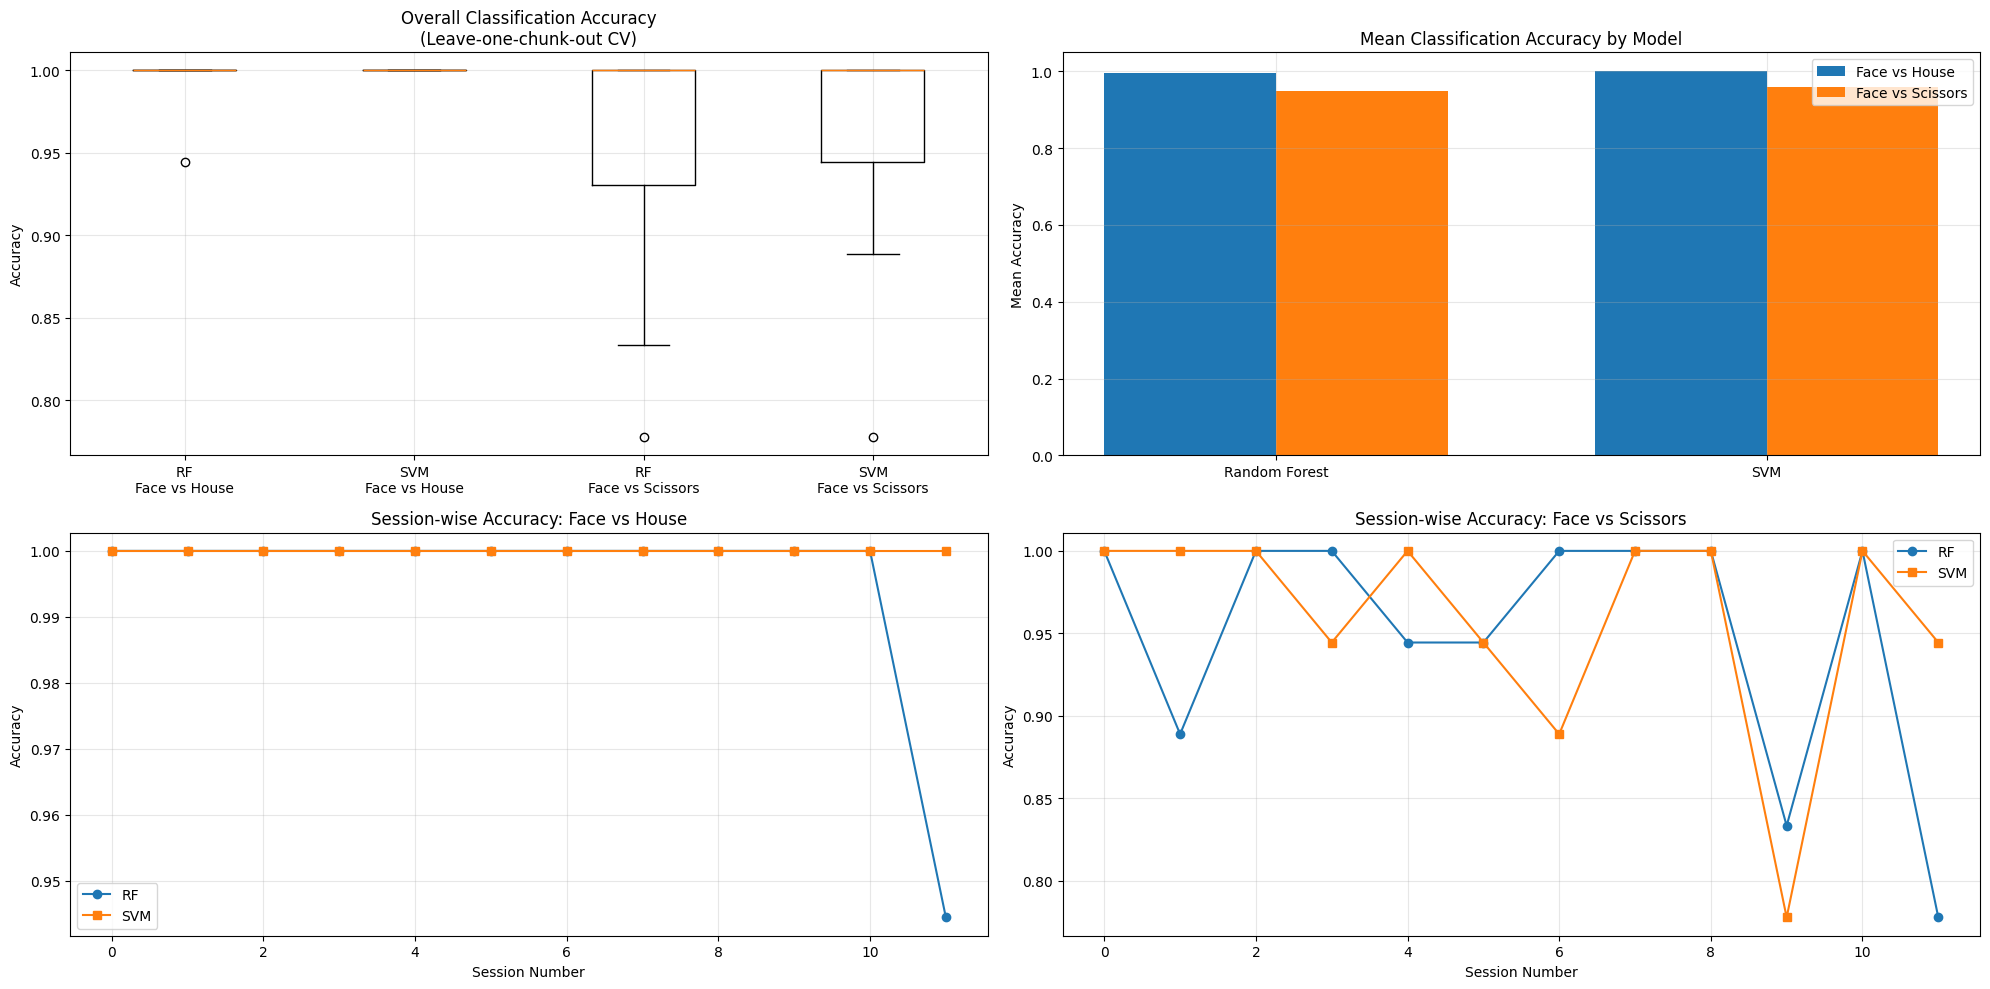

In [17]:
vt_face_house = "vt_face_vs_house.csv"
vt_face_scissors = "vt_face_vs_scissors.csv"
run(vt_face_house, vt_face_scissors)

# Binary Classification of Inferior_frontal region (face vs house) and (face vs scissors)

 ===inferior_frontal Region Classification Analysis ===

Processing Inferior_frontal_face_vs_house.csv

Original X shape: (216, 86)

Dataset Information:
Total samples: 216
face: 108 samples
house: 108 samples

Processing Inferior_frontal_face_vs_scissors.csv

Original X shape: (216, 86)

Dataset Information:
Total samples: 216
face: 108 samples
scissors: 108 samples

Face vs House Information:
Total samples: 216 (108 class 0, 108 class 1)

Training RF for Face vs House...
Mean CV accuracy: 0.574 (+/- 0.355)

Session-wise accuracies:
Session 0: 0.167
Session 1: 0.833
Session 2: 0.556
Session 3: 0.500
Session 4: 0.556
Session 5: 0.667
Session 6: 0.833
Session 7: 0.778
Session 8: 0.500
Session 9: 0.500
Session 10: 0.500
Session 11: 0.500

Training SVM for Face vs House...
Mean CV accuracy: 0.583 (+/- 0.335)

Session-wise accuracies:
Session 0: 0.278
Session 1: 0.889
Session 2: 0.722
Session 3: 0.500
Session 4: 0.500
Session 5: 0.611
Session 6: 0.889
Session 7: 0.500
Session 8: 0.500
Sess

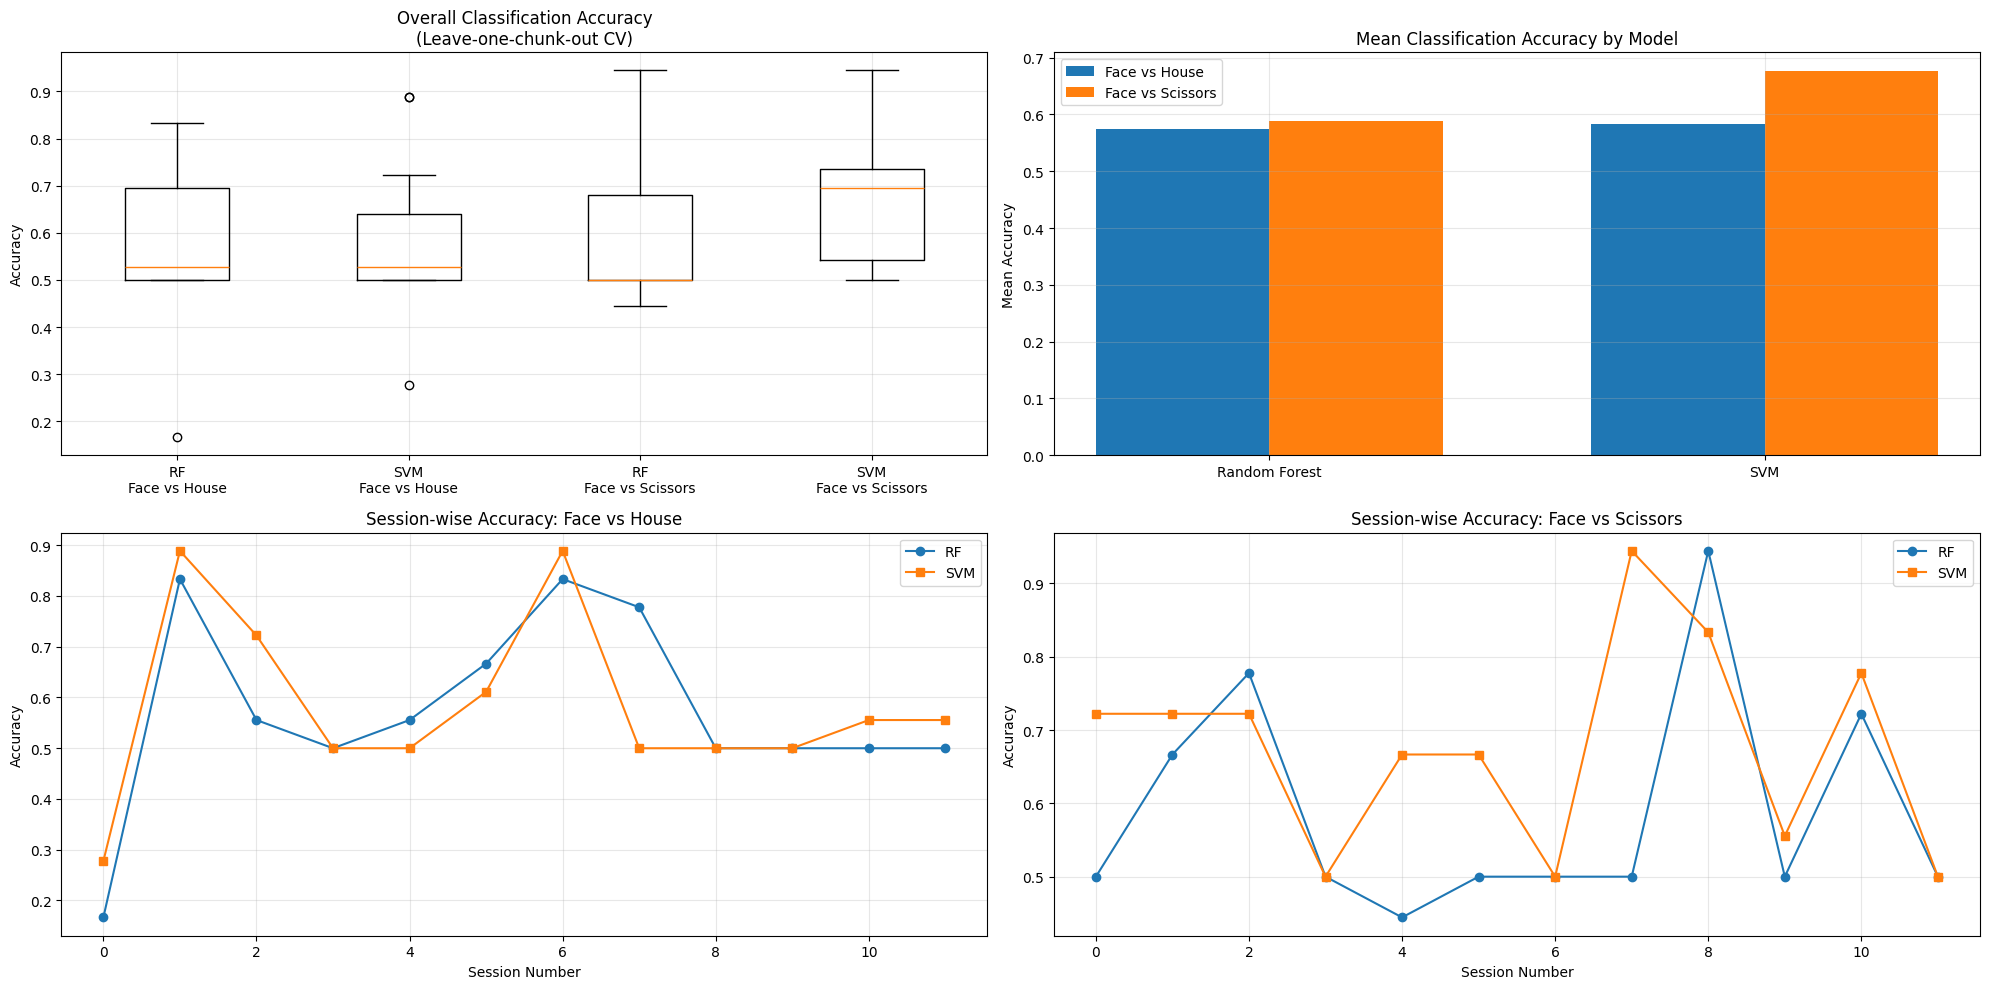

In [18]:
inferior_face_house = "Inferior_frontal_face_vs_house.csv"
inferior_face_scissors = "Inferior_frontal_face_vs_scissors.csv"

run(inferior_face_house, inferior_face_scissors, mode = "all_features", region = "inferior_frontal")

# Binary Classification of VT region (50% fetures) (face vs house) and (face vs scissors)

 ===vt_50% Region Classification Analysis ===

Processing vt_face_vs_house.csv

Original X shape: (216, 577)
After 50% feature selection X shape: (216, 288)

Dataset Information:
Total samples: 216
face: 108 samples
house: 108 samples

Processing vt_face_vs_scissors.csv

Original X shape: (216, 577)
After 50% feature selection X shape: (216, 288)

Dataset Information:
Total samples: 216
face: 108 samples
scissors: 108 samples

Face vs House Information:
Total samples: 216 (108 class 0, 108 class 1)

Training RF for Face vs House...
Mean CV accuracy: 0.995 (+/- 0.031)

Session-wise accuracies:
Session 0: 1.000
Session 1: 1.000
Session 2: 1.000
Session 3: 1.000
Session 4: 0.944
Session 5: 1.000
Session 6: 1.000
Session 7: 1.000
Session 8: 1.000
Session 9: 1.000
Session 10: 1.000
Session 11: 1.000

Training SVM for Face vs House...
Mean CV accuracy: 1.000 (+/- 0.000)

Session-wise accuracies:
Session 0: 1.000
Session 1: 1.000
Session 2: 1.000
Session 3: 1.000
Session 4: 1.000
Session 5: 1

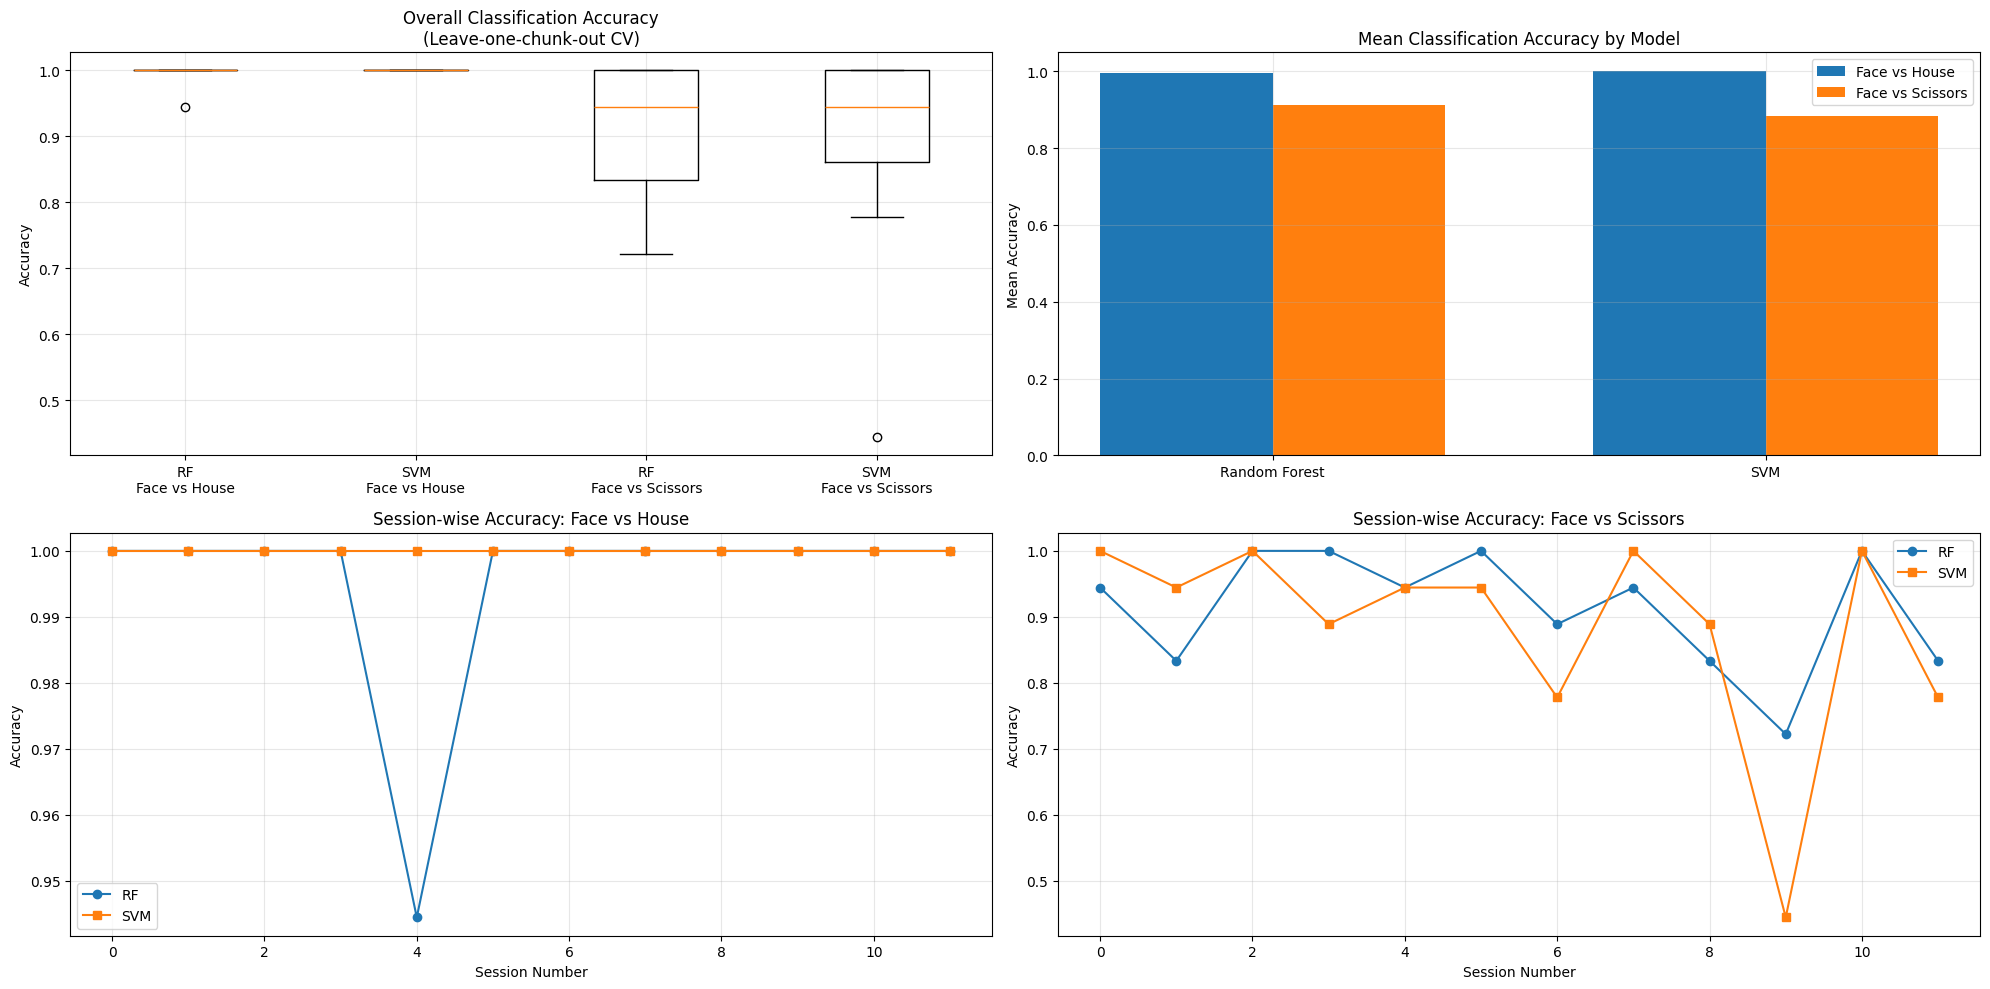

In [19]:
vt_face_house = "vt_face_vs_house.csv"
vt_face_scissors = "vt_face_vs_scissors.csv"
mode = "50_%_features"
run(vt_face_house, vt_face_scissors, mode, region = "vt_50%")